<a href="https://colab.research.google.com/github/yrribeiro/graduation-usage/blob/main/preprocessing_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[**tweets.csv**](https://gist.github.com/yrribeiro/48c8cdb33c2c552d86f36e8ead6f42c2), dataset used in this exercise.

In [87]:
import re
import string
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tag import pos_tag
from nltk.stem.lancaster import LancasterStemmer

# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger')                  DESCOMENTE ANTES DE RODAR PELA PRIMEIRA VEZ

dataset = 'tweets.csv'

**Questão 1**: *Determine a distribuição de comprimentos dos textos (em quantidade de caracteres), listando estas quantidades e plotando um histograma.*

In [37]:
df = pd.read_csv(dataset)
txt_column = df['text']
print(f'Size: {df.shape}\nColumns: {list(df.columns)}')

Size: (11370, 5)
Columns: ['id', 'keyword', 'location', 'text', 'target']


In [38]:
each_txt_length = np.array([len(txt_length) for txt_length in txt_column])
each_txt_length

array([125, 131,  63, ..., 139, 105,  46])

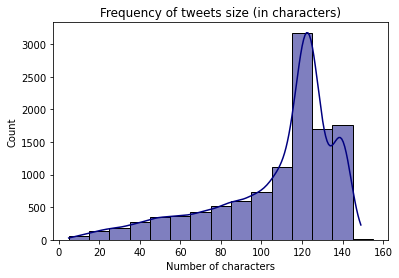

In [39]:
histogram = sns.histplot(each_txt_length,
             stat='count', 
             color='navy', 
             binwidth=10,
             alpha = 0.5,
             kde = True
            ).set(title='Frequency of tweets size (in characters)', xlabel='Number of characters')

**Questão 2**: *Remova todas as palavras que contêm números; Converta as palavras para minúsculas; Remova pontuação; Tokenize os textos em palavras, gerando um dicionário  único com **n** tokens e convertendo cada texto em um vetor de dimensão **n** com a respectiva contagem de palavras. Em seguida, encontre as palavras mais frequentes da base de textos.*

In [40]:
# remove urls
rex_pattern = r'http[s]?://([\w\.]+)\/([\w]+)' 
replacer = lambda x: re.sub(rex_pattern, '', x)
txt_column = list(map(replacer, txt_column))
txt_column

['Communal violence in Bhainsa, Telangana. "Stones were pelted on Muslims\' houses and some houses and vehicles were set ablaze…',
 'Telangana: Section 144 has been imposed in Bhainsa from January 13 to 15, after clash erupted between two groups on January 12. Po…',
 'Arsonist sets cars ablaze at dealership ',
 'Arsonist sets cars ablaze at dealership  ',
 '"Lord Jesus, your love brings freedom and pardon. Fill me with your Holy Spirit and set my heart ablaze with your l… ',
 'If this child was Chinese, this tweet would have gone viral. Social media would be ablaze. SNL would have made a racist j…',
 'Several houses have been set ablaze in Ngemsibaa village, Oku sub division in the North West Region of Cameroon by… ',
 'Asansol: A BJP office in Salanpur village was set ablaze last night. BJP has alleged that TMC is behind the incident. Police has b…',
 "National Security Minister, Kan Dapaah's side chic has set the internet ablaze with her latest powerful video.… ",
 'This creature who

In [41]:
# remove number
rex_pattern = r'[\d+]' 
replacer = lambda x: re.sub(rex_pattern, '', x)
txt_column = list(map(replacer, txt_column))

In [42]:
txt_column

['Communal violence in Bhainsa, Telangana. "Stones were pelted on Muslims\' houses and some houses and vehicles were set ablaze…',
 'Telangana: Section  has been imposed in Bhainsa from January  to , after clash erupted between two groups on January . Po…',
 'Arsonist sets cars ablaze at dealership ',
 'Arsonist sets cars ablaze at dealership  ',
 '"Lord Jesus, your love brings freedom and pardon. Fill me with your Holy Spirit and set my heart ablaze with your l… ',
 'If this child was Chinese, this tweet would have gone viral. Social media would be ablaze. SNL would have made a racist j…',
 'Several houses have been set ablaze in Ngemsibaa village, Oku sub division in the North West Region of Cameroon by… ',
 'Asansol: A BJP office in Salanpur village was set ablaze last night. BJP has alleged that TMC is behind the incident. Police has b…',
 "National Security Minister, Kan Dapaah's side chic has set the internet ablaze with her latest powerful video.… ",
 'This creature who’s soul i

In [43]:
# remove punctuation and emojis
rex_pattern = r'[^\w\s]+'
replacer = lambda x: re.sub(rex_pattern, '', x)
txt_column = list(map(replacer, txt_column))
txt_column

['Communal violence in Bhainsa Telangana Stones were pelted on Muslims houses and some houses and vehicles were set ablaze',
 'Telangana Section  has been imposed in Bhainsa from January  to  after clash erupted between two groups on January  Po',
 'Arsonist sets cars ablaze at dealership ',
 'Arsonist sets cars ablaze at dealership  ',
 'Lord Jesus your love brings freedom and pardon Fill me with your Holy Spirit and set my heart ablaze with your l ',
 'If this child was Chinese this tweet would have gone viral Social media would be ablaze SNL would have made a racist j',
 'Several houses have been set ablaze in Ngemsibaa village Oku sub division in the North West Region of Cameroon by ',
 'Asansol A BJP office in Salanpur village was set ablaze last night BJP has alleged that TMC is behind the incident Police has b',
 'National Security Minister Kan Dapaahs side chic has set the internet ablaze with her latest powerful video ',
 'This creature whos soul is no longer clarent but blue 

In [44]:
# transform to lowercase and tokenize
all_tokens = []
i = 0
for tokens in txt_column:
  txt_column[i] = tokens.lower()
  all_tokens += word_tokenize(txt_column[i])
  i = i+1
len(all_tokens)

183989

In [45]:
txt_column

['communal violence in bhainsa telangana stones were pelted on muslims houses and some houses and vehicles were set ablaze',
 'telangana section  has been imposed in bhainsa from january  to  after clash erupted between two groups on january  po',
 'arsonist sets cars ablaze at dealership ',
 'arsonist sets cars ablaze at dealership  ',
 'lord jesus your love brings freedom and pardon fill me with your holy spirit and set my heart ablaze with your l ',
 'if this child was chinese this tweet would have gone viral social media would be ablaze snl would have made a racist j',
 'several houses have been set ablaze in ngemsibaa village oku sub division in the north west region of cameroon by ',
 'asansol a bjp office in salanpur village was set ablaze last night bjp has alleged that tmc is behind the incident police has b',
 'national security minister kan dapaahs side chic has set the internet ablaze with her latest powerful video ',
 'this creature whos soul is no longer clarent but blue 

In [46]:
cv = CountVectorizer()
X = cv.fit_transform(txt_column)
# print(cv.get_feature_names())
array = X.toarray()
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [47]:
summ = np.sum(array, axis=0)
# print(summ)
sorted_arr_index = np.argsort(summ)
# print(sorted_arr_index)
n = len(sorted_arr_index)
how_many_words = sorted_arr_index[n:n-6:-1]
# print(how_many_words)
i = 1
for index in how_many_words:
  print(f'{i}° mais frequente: {cv.get_feature_names()[index]} (Repetida {summ[index]} vezes)')
  i = i+1

1° mais frequente: the (Repetida 7636 vezes)
2° mais frequente: to (Repetida 4330 vezes)
3° mais frequente: of (Repetida 3610 vezes)
4° mais frequente: in (Repetida 3394 vezes)
5° mais frequente: and (Repetida 3149 vezes)


**Questão 3**: *Remova stopwords; Realize rotulação de POS; Realize stemização; Exiba os resultados em alguns textos. Verifique quais são as palavras mais frequentes e compare com as palavras mais frequentes da questão anterior.*

In [58]:
# remove stopwords
cv = CountVectorizer(stop_words='english')
no_stopwords_array = cv.fit_transform(txt_column).toarray()
# pd.DataFrame(no_stopwords_array, columns=cv.get_feature_names())

,__,____________,___________________,_______________________________________________,__involvement,aa,aaaaaaaaacccccckkkkkkkk,aab,aadharcard,aalaathun,aampe,aampes,aap,aaron,aaronjayjack,aayega,ab,aba,abaf,abandon,abandoned,abandoning,abated,abbey,abbot,abbots,abbotsford,abbott,abbotts,abby,abc,abcthe,abd,abdel,abdicating,abducted,abducting,abduction,abductors,abdullah,...,방찬,방탄소년단,빵빵야,사랑꾼들,새로운_엑스원_결성지지,스트레이키즈,승우,아미,안사랑해,어떻게,엑스원,완벽한_주,종인아_생일축,투모로우바이투게더,필릭스,하윤빈,한승우,호주즈,환상체야,𝐈𝐦,𝐋𝐢𝐤𝐞,𝐒𝐨𝐦𝐞,𝐜𝐡𝐚𝐧𝐠𝐞,𝐡𝐨𝐥𝐝𝐢𝐧𝐠,𝐡𝐨𝐰,𝐧𝐞𝐯𝐞𝐫,𝐨𝐧,𝐭𝐡𝐢𝐧𝐠𝐬,𝐭𝐢𝐠𝐡𝐭,𝐭𝐨,𝐲𝐨𝐮,𝒋𝒊𝒍𝒍,𝒗𝒂𝒍𝒆𝒏𝒕𝒊𝒏𝒆,𝗖𝗢𝗥𝗧,𝗘𝗻𝗲𝗿𝗴𝘆,𝗚𝗶𝘃𝗲𝗮𝘄𝗮𝘆,𝗜𝗻𝗰,𝗠𝗔𝗬,𝗣𝗲𝘁𝗿𝗼𝘁𝗲𝗾,𝗳𝗼𝗿
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11365,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11366,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11367,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11368,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
summ = np.sum(no_stopwords_array, axis=0)
sorted_arr_index = np.argsort(summ)
n = len(sorted_arr_index)
how_many_words = sorted_arr_index[n:n-6:-1]
i = 1
for index in how_many_words:
  print(f'{i}° mais frequente: {cv.get_feature_names()[index]} (Repetida {summ[index]} vezes)')
  i = i+1

1° mais frequente: just (Repetida 579 vezes)
2° mais frequente: amp (Repetida 567 vezes)
3° mais frequente: like (Repetida 534 vezes)
4° mais frequente: people (Repetida 519 vezes)
5° mais frequente: im (Repetida 455 vezes)


In [49]:
Assim, conseguimos entender o porquê da necessidade de remoção de stopwords. Elas interferem no estudo do resultado, uma vez 
que é normal em uma linguagem a frequência de artigos e advérbios ser muito maior.

In [86]:
# pos tagging
text_sample = [txt_column[sentence] for sentence in range(70,75)]
i = 0
for sentence in text_sample:
  tokens = pos_tag(word_tokenize(sentence))
  print(f'\n{i+1}° exemplo:\nTexto: "{text_sample[i]}"\nPOS Tag: {tokens}')
  i = i + 1


1° exemplo:
Texto: "yea it wasnt that long she killed me in like  or  seconds but not sure would have to "
POS Tag: [('yea', 'NN'), ('it', 'PRP'), ('wasnt', 'VBD'), ('that', 'IN'), ('long', 'JJ'), ('she', 'PRP'), ('killed', 'VBD'), ('me', 'PRP'), ('in', 'IN'), ('like', 'IN'), ('or', 'CC'), ('seconds', 'NNS'), ('but', 'CC'), ('not', 'RB'), ('sure', 'JJ'), ('would', 'MD'), ('have', 'VB'), ('to', 'TO')]

2° exemplo:
Texto: "honored to have an essay in aftershock marking the th anniversary of alvin tofflers future shock compendium of essays in t"
POS Tag: [('honored', 'VBN'), ('to', 'TO'), ('have', 'VB'), ('an', 'DT'), ('essay', 'NN'), ('in', 'IN'), ('aftershock', 'NN'), ('marking', 'VBG'), ('the', 'DT'), ('th', 'JJ'), ('anniversary', 'NN'), ('of', 'IN'), ('alvin', 'JJ'), ('tofflers', 'NNS'), ('future', 'JJ'), ('shock', 'NN'), ('compendium', 'NN'), ('of', 'IN'), ('essays', 'NNS'), ('in', 'IN'), ('t', 'NN')]

3° exemplo:
Texto: "tickets on sale  aftershock  nowplaying khdradio"
POS Tag: [(

In [100]:
# stemming
stemmer = LancasterStemmer()
text_sample = [txt_column[sentence] for sentence in range(0,5)]
for sentence in text_sample:
  print(f'\nSENTENCE: {sentence}')
  for word in word_tokenize(sentence):
    print(stemmer.stem(word))


SENTENCE: communal violence in bhainsa telangana stones were pelted on muslims houses and some houses and vehicles were set ablaze
commun
viol
in
bhains
telangan
ston
wer
pelt
on
muslim
hous
and
som
hous
and
vehic
wer
set
ablaz

SENTENCE: telangana section  has been imposed in bhainsa from january  to  after clash erupted between two groups on january  po
telangan
sect
has
been
impos
in
bhains
from
janu
to
aft
clash
erupt
between
two
group
on
janu
po

SENTENCE: arsonist sets cars ablaze at dealership 
arson
set
car
ablaz
at
deal

SENTENCE: arsonist sets cars ablaze at dealership  
arson
set
car
ablaz
at
deal

SENTENCE: lord jesus your love brings freedom and pardon fill me with your holy spirit and set my heart ablaze with your l 
lord
jes
yo
lov
bring
freedom
and
pardon
fil
me
with
yo
holy
spirit
and
set
my
heart
ablaz
with
yo
l
